In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Twitter tweets/Twitter Sentiments.csv')

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

<Axes: >

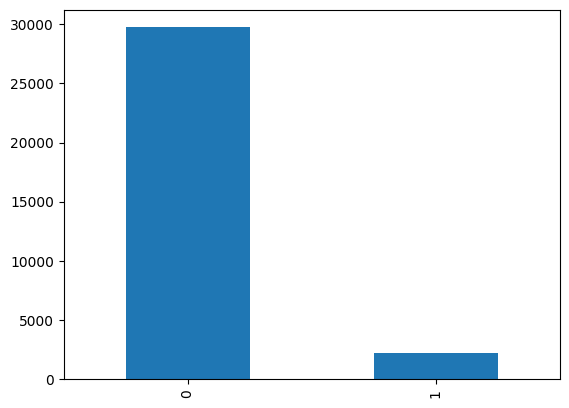

In [6]:
df.label.value_counts().sort_index().plot(kind='bar')

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
lm = WordNetLemmatizer()

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
def tokenize(text):
  return [lm.lemmatize(token) for token in word_tokenize(text) if token.isalpha()]

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words = stopwords.words('english'),
                             ngram_range=(1,4),
                             max_features=5000)

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
vectorizer.fit(df.tweet)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=5000, ngram_range=(1, 4),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7844dabe85e0>)

In [17]:
len(vectorizer.vocabulary_)

5000

In [18]:
vectorizer.get_feature_names_out()[:200]

array(['aap', 'able', 'abrahamhicks', 'abrahamhicks lawofattraction',
       'abrahamhicks lawofattraction healthy',
       'abrahamhicks lawofattraction healthy healing', 'absolute',
       'absolutely', 'abt', 'abuse', 'accept', 'accepted',
       'accepted user', 'accepted user amp', 'accepted user amp sale',
       'access', 'accessory', 'accident', 'according', 'account', 'ace',
       'achieve', 'acne', 'acne altwaystoheal',
       'acne altwaystoheal healthy', 'acne altwaystoheal healthy healing',
       'across', 'act', 'acting', 'action', 'active', 'activity', 'actor',
       'actress', 'actual', 'actually', 'ad', 'adam', 'adapt',
       'adapt environment', 'adapt environment need',
       'adapt environment need tear', 'add', 'added', 'address', 'adele',
       'admit', 'adorable', 'adult', 'advanced', 'adveising', 'adventure',
       'advice', 'advocate', 'af', 'affect', 'affected', 'affirmation',
       'afford', 'afraid', 'africa', 'african', 'afternoon', 'age',
       'a

In [19]:
inputs = vectorizer.transform(df.tweet)

In [20]:
inputs.shape

(31962, 5000)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(inputs, df.label, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(22373, 5000)

In [24]:
X_test.shape

(9589, 5000)

In [25]:
y_train.shape

(22373,)

In [26]:
y_test.shape

(9589,)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
max_iter = 5000
model = LogisticRegression(max_iter = 5000,solver='sag')

In [29]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000, solver='sag')

In [30]:
predictions = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [32]:
accuracy_score(predictions,y_test)

0.9491083533215142

In [33]:
f1_score(predictions,y_test)

0.4718614718614718

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
model2 = MultinomialNB()

In [36]:
model2.fit(X_train,y_train)

MultinomialNB()

In [37]:
prediction2 = model2.predict(X_test)

In [38]:
accuracy_score(prediction2,y_test)

0.9459797684847221

In [39]:
f1_score(prediction2,y_test,average='weighted')

0.9587247638895449

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(prediction2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      9359
           1       0.29      0.86      0.43       230

    accuracy                           0.95      9589
   macro avg       0.64      0.90      0.70      9589
weighted avg       0.98      0.95      0.96      9589



In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
print(confusion_matrix(prediction2,y_test))

[[8873  486]
 [  32  198]]
